<a href="https://colab.research.google.com/github/AKASH4671/AI-Powered-Portfolio-Optimization-and-Risk-Management/blob/main/2_portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

**Setup**

In [7]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Define project path
project_path = "/content/drive/MyDrive/Colab Notebooks/Finance Projects/AI-Powered-Portfolio-Optimization-and-Risk-Management/"

#Load saved data from Step 1
tickers = ['AAPL', 'MSFT', 'AMZN', 'JPM', 'GS', 'XOM', 'JNJ', 'NVDA', 'WMT', 'UNH']
mean_returns = pd.read_csv(project_path + "data/mean_returns.csv", index_col=0).squeeze()
cov_matrix = pd.read_csv(project_path + "data/cov_matrix.csv", index_col=0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**STEP 2.1 — Generate Efficient Frontier (Random Portfolios)**

In [8]:
# Number of portfolios to simulate
num_portfolios = 10_000
results = np.zeros((3, num_portfolios))
weights_record = []

# Loop through portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize to 1
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_stddev

    results[0,i] = portfolio_stddev
    results[1,i] = portfolio_return
    results[2,i] = sharpe_ratio

# Convert results to DataFrame
results_df = pd.DataFrame(results.T, columns=['Volatility', 'Return', 'Sharpe Ratio'])
weights_df = pd.DataFrame(weights_record, columns=tickers)


In [11]:
print(results_df.head())
print("-------------------------------------------------------------------------")
print(weights_df.head())

   Volatility    Return  Sharpe Ratio
0    0.013297  0.000943      0.070930
1    0.014487  0.001196      0.082582
2    0.012879  0.000980      0.076095
3    0.012986  0.001064      0.081922
4    0.013137  0.001131      0.086065
-------------------------------------------------------------------------
       AAPL      MSFT      AMZN       JPM        GS       XOM       JNJ  \
0  0.064742  0.157713  0.132951  0.075583  0.085583  0.131224  0.026111   
1  0.068122  0.133528  0.135090  0.056914  0.070404  0.141893  0.130357   
2  0.148994  0.032516  0.124557  0.078219  0.134468  0.094080  0.025991   
3  0.162602  0.004711  0.008475  0.126235  0.035655  0.127619  0.093525   
4  0.074545  0.033793  0.074028  0.108898  0.059035  0.178367  0.118136   

       NVDA       WMT       UNH  
0  0.136852  0.031039  0.158202  
1  0.165681  0.049929  0.048081  
2  0.169351  0.110477  0.081348  
3  0.171315  0.094147  0.175716  
4  0.059648  0.153519  0.140031  


**STEP 2.2 — Plot the Efficient Frontier**

/tmp/ipython-input-12-1298029375.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_port[0], max_sharpe_port[1], marker='*', color='r', s=300, label='Max Sharpe')
/tmp/ipython-input-12-1298029375.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[0], min_vol_port[1], marker='X', color='black', s=300, label='Min Volatility')


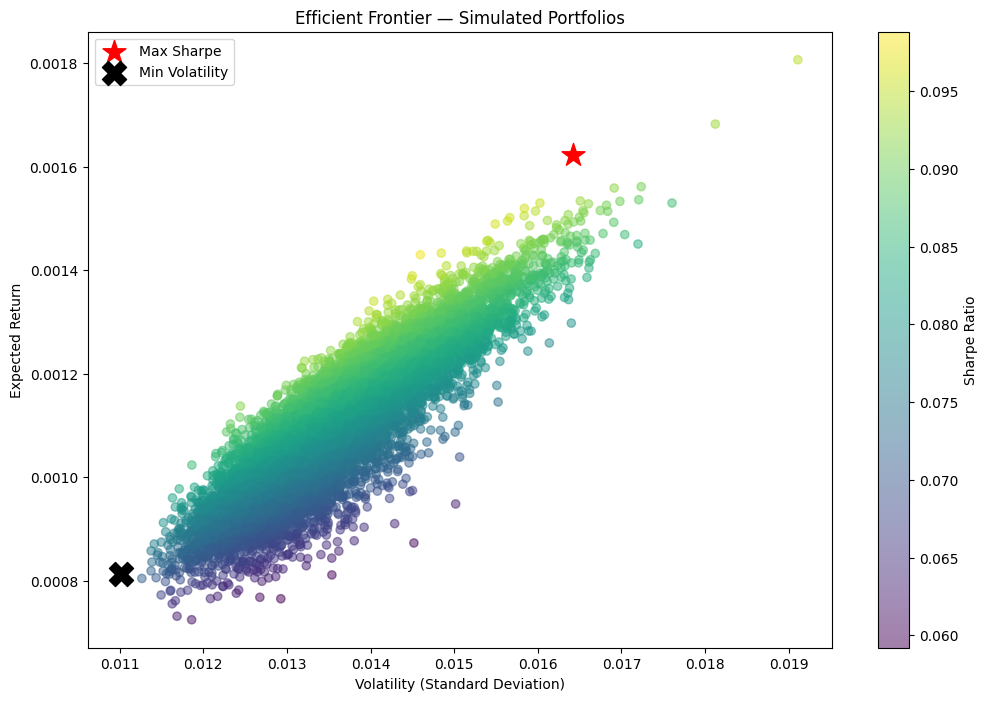

In [12]:
# Find portfolio with max Sharpe and min Volatility
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
min_vol_idx = results_df['Volatility'].idxmin()

# Corresponding values
max_sharpe_port = results_df.loc[max_sharpe_idx]
min_vol_port = results_df.loc[min_vol_idx]

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(results_df['Volatility'], results_df['Return'],
                      c=results_df['Sharpe Ratio'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier — Simulated Portfolios')

# Highlight Optimal Points
plt.scatter(max_sharpe_port[0], max_sharpe_port[1], marker='*', color='r', s=300, label='Max Sharpe')
plt.scatter(min_vol_port[0], min_vol_port[1], marker='X', color='black', s=300, label='Min Volatility')
plt.legend()

# Save plot
os.makedirs(project_path + "plots", exist_ok=True)
plt.savefig(project_path + "plots/efficient_frontier.png")
plt.show()


**STEP 2.3 — Display Portfolio Weights for Optimal Portfolios**

In [13]:
print("🔺 Max Sharpe Ratio Portfolio:")
display(weights_df.loc[max_sharpe_idx])

print("🔻 Minimum Volatility Portfolio:")
display(weights_df.loc[min_vol_idx])

🔺 Max Sharpe Ratio Portfolio:


,2343
AAPL,0.049759
MSFT,0.031154
AMZN,0.011152
JPM,0.007681
GS,0.117977
XOM,0.054812
JNJ,0.340914
NVDA,0.061226
WMT,0.299304
UNH,0.026023


🔻 Minimum Volatility Portfolio:


,5173
AAPL,0.036286
MSFT,0.024090
AMZN,0.173385
JPM,0.263112
GS,0.006145
XOM,0.073920
JNJ,0.022242
NVDA,0.009597
WMT,0.273172
UNH,0.118050


**Plot Portfolio Weights**

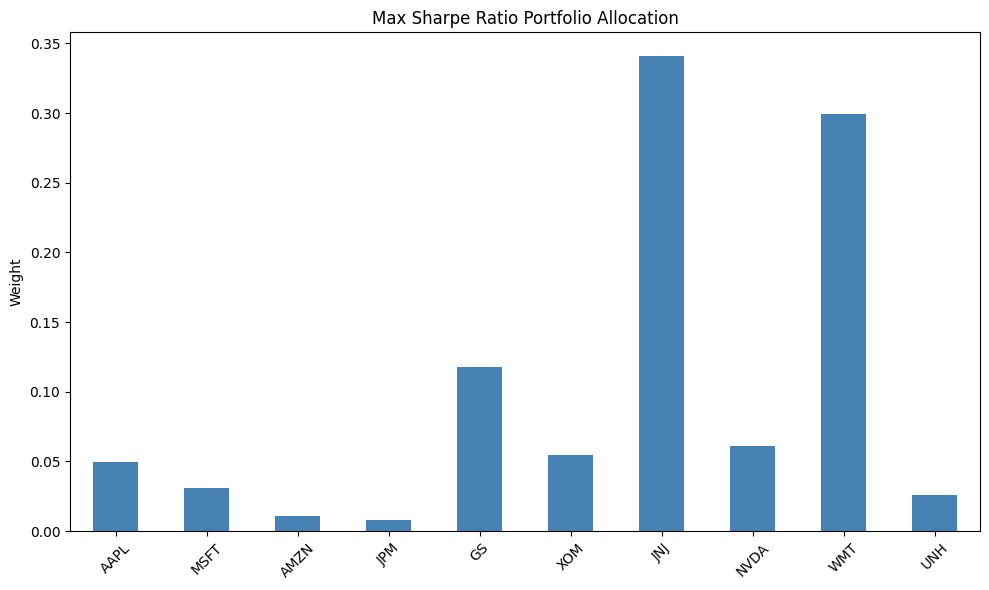

In [14]:
# Plot weights for Max Sharpe Portfolio
weights_df.loc[max_sharpe_idx].plot(kind='bar', figsize=(10,6), color='steelblue')
plt.title("Max Sharpe Ratio Portfolio Allocation")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(project_path + "plots/portfolio_weights.png")
plt.show()
